# 2347251
# Samarth A
# ADA ETE COMPONENT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/NIFTY 50-15-08-2023-to-15-08-2024.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,16-AUG-2023,19369.00,19482.75,19317.20,19465.00,226627230.0,21484.66
1,17-AUG-2023,19450.55,19461.55,19326.25,19365.25,268663456.0,26505.65
2,18-AUG-2023,19301.75,19373.80,19253.60,19310.15,256142364.0,25641.41
3,21-AUG-2023,19320.65,19425.95,19296.30,19393.60,262589133.0,20738.75
4,22-AUG-2023,19417.10,19443.50,19381.30,19396.45,208704354.0,20226.48


In [ ]:
data.shape

(248, 7)

In [ ]:
print(data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64


In [ ]:
data.interpolate(method='linear', inplace=True)

<ipython-input-4-6d64e3ce7f8a>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)


In [ ]:
print(data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64


In [ ]:
data['Date '] = pd.to_datetime(data['Date '])
data.set_index('Date ', inplace=True)
print(data.head())

               Open      High       Low     Close   Shares Traded   \
Date                                                                 
2023-08-16  19369.00  19482.75  19317.20  19465.00     226627230.0   
2023-08-17  19450.55  19461.55  19326.25  19365.25     268663456.0   
2023-08-18  19301.75  19373.80  19253.60  19310.15     256142364.0   
2023-08-21  19320.65  19425.95  19296.30  19393.60     262589133.0   
2023-08-22  19417.10  19443.50  19381.30  19396.45     208704354.0   

            Turnover (₹ Cr)  
Date                         
2023-08-16         21484.66  
2023-08-17         26505.65  
2023-08-18         25641.41  
2023-08-21         20738.75  
2023-08-22         20226.48  


<ipython-input-107-98d5c8e8b5f9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date '] = pd.to_datetime(data['Date '])


randomforest

In [ ]:
data['Trend'] = np.where(data['Close '].shift(-1) > data['Close '], 1, 0)

In [ ]:
data['Daily_Return'] = data['Close '].pct_change()
data['MA_5'] = data['Close '].rolling(window=5).mean()
data['MA_10'] = data['Close '].rolling(window=10).mean()

In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data[['Open ', 'High ', 'Low ', 'Shares Traded ', 'Daily_Return', 'MA_5', 'MA_10']]
y = data['Trend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy:.2f}')

Random Forest Model Accuracy: 0.56


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47        30
           1       0.62      0.62      0.62        42

    accuracy                           0.56        72
   macro avg       0.54      0.54      0.54        72
weighted avg       0.56      0.56      0.56        72



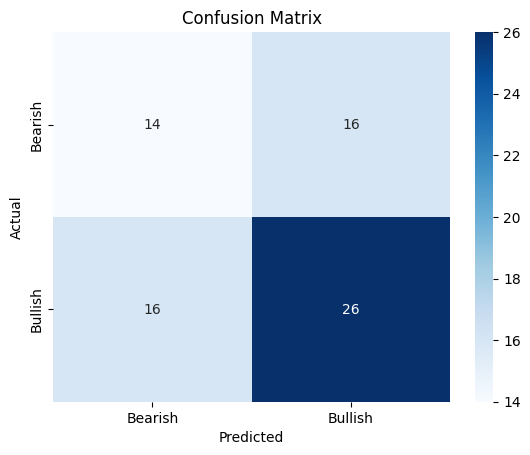

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bearish', 'Bullish'], yticklabels=['Bearish', 'Bullish'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-118-b816fc68c364>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


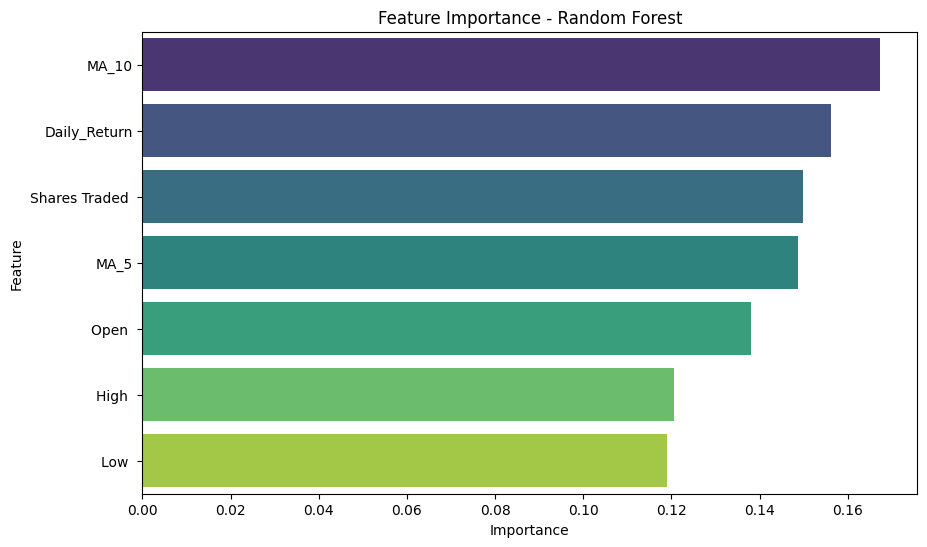

In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

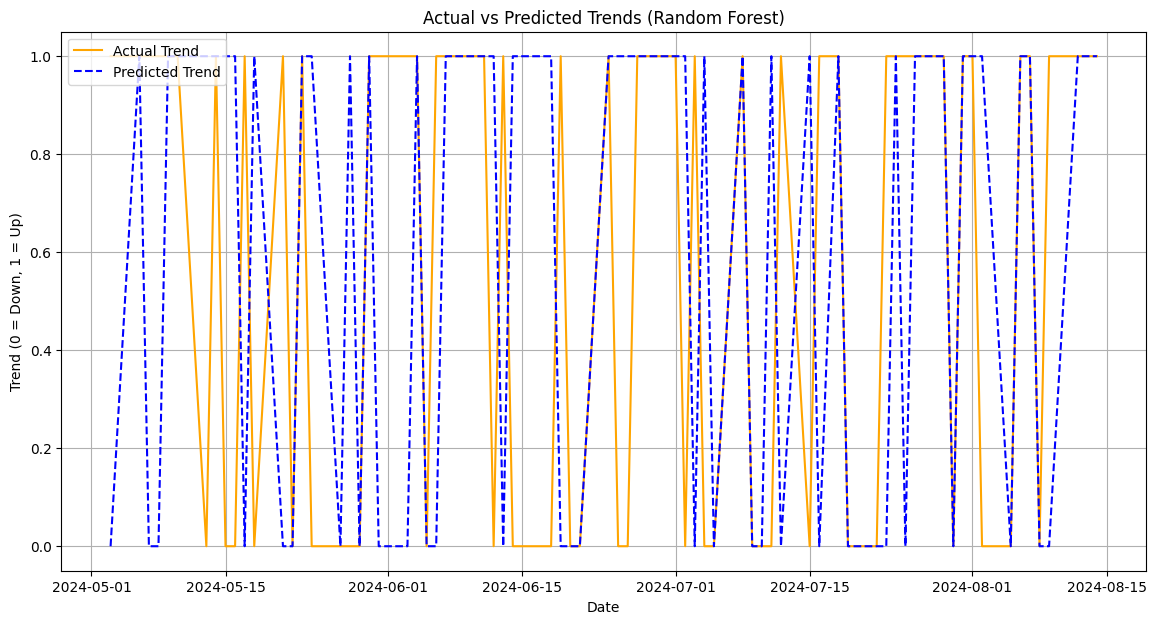

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(data.index[-len(y_test):], y_test, label='Actual Trend', color='orange')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Trend', color='blue', linestyle='--')

plt.title('Actual vs Predicted Trends (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Trend (0 = Down, 1 = Up)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

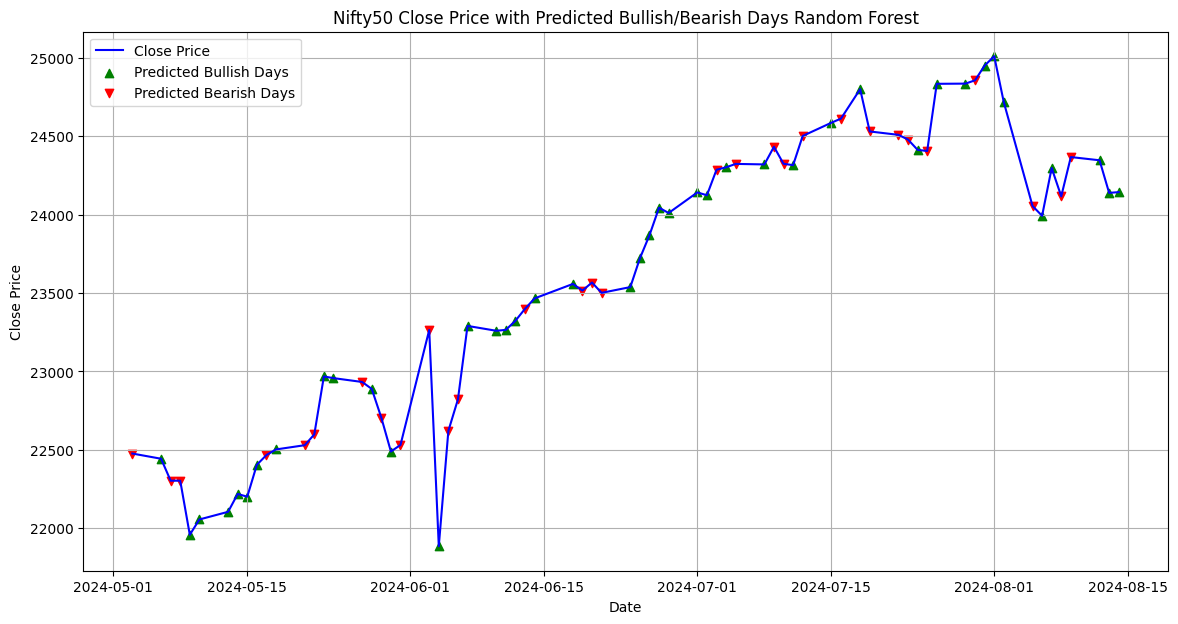

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], data['Close '][-len(y_test):], label='Close Price', color='blue')

bullish_days = data.index[-len(y_test):][y_pred == 1]
plt.scatter(bullish_days, data['Close '][-len(y_test):][y_pred == 1], color='green', label='Predicted Bullish Days', marker='^')

bearish_days = data.index[-len(y_test):][y_pred == 0]
plt.scatter(bearish_days, data['Close '][-len(y_test):][y_pred == 0], color='red', label='Predicted Bearish Days', marker='v')
plt.title('Nifty50 Close Price with Predicted Bullish/Bearish Days Random Forest')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# **LSTM**

In [ ]:
data = data[['Close ']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
X_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.1739
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0318
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0067
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0152
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0071
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0060
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0059
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0070
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.0062
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0057
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0051
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0040
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0045
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0044
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0043
Epoch 16/20
5/5 ━━━━━━━━━━━━━━

In [ ]:
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step


In [ ]:
real_stock_price = data.iloc[train_size:].values

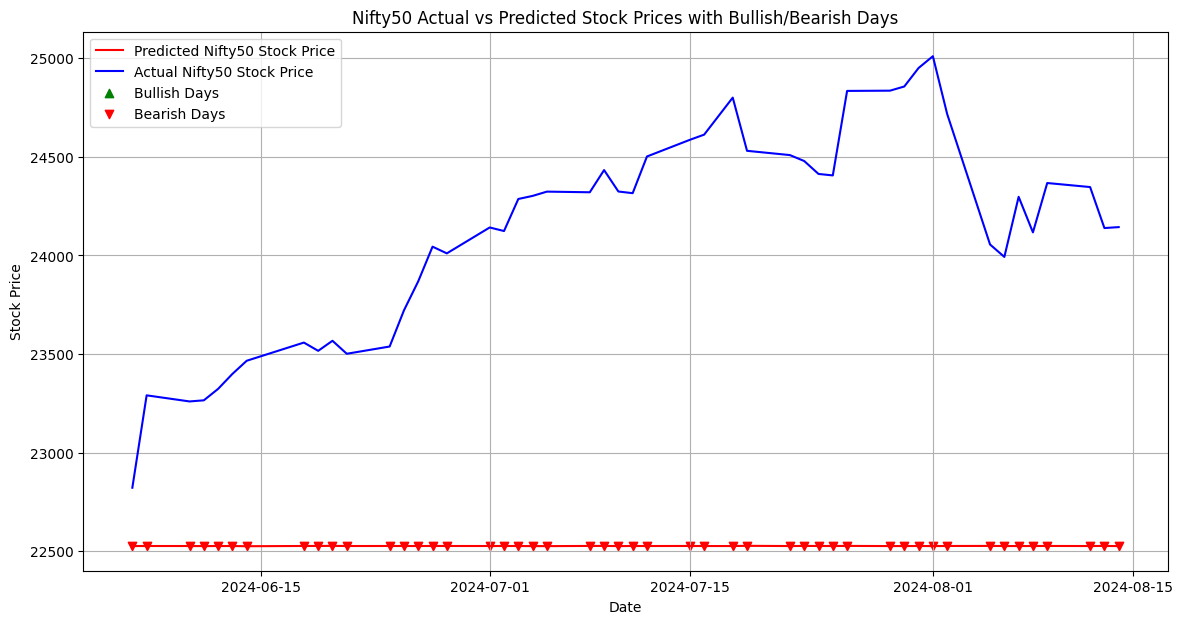

In [ ]:
predicted_stock_price = predicted_stock_price.flatten()

if len(data.index[train_size:]) != len(predicted_stock_price):
    min_len = min(len(data.index[train_size:]), len(predicted_stock_price))
    data_index = data.index[train_size:][-min_len:]
    predicted_stock_price = predicted_stock_price[-min_len:]
else:
    data_index = data.index[train_size:]

plt.figure(figsize=(14, 7))
plt.plot(data_index, predicted_stock_price, color='red', label='Predicted Nifty50 Stock Price')
plt.plot(data_index, data['Close '][train_size:], color='blue', label='Actual Nifty50 Stock Price')

bullish_days = data_index[predicted_stock_price > data['Close '][train_size:][:len(predicted_stock_price)]]
bearish_days = data_index[predicted_stock_price <= data['Close '][train_size:][:len(predicted_stock_price)]]

plt.scatter(bullish_days, predicted_stock_price[predicted_stock_price > data['Close '][train_size:][:len(predicted_stock_price)]],
            color='green', marker='^', label='Bullish Days')

plt.scatter(bearish_days, predicted_stock_price[predicted_stock_price <= data['Close '][train_size:][:len(predicted_stock_price)]],
            color='red', marker='v', label='Bearish Days')

plt.title('Nifty50 Actual vs Predicted Stock Prices with Bullish/Bearish Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import math

In [ ]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 1686.2191923326343


# **SVC**

In [ ]:
X = data[['Open ', 'High ', 'Low ', 'Shares Traded ']]
y = data['Trend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
data.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_classifier = SVC(kernel='linear')

In [ ]:
X_train_clean = X_train[~np.isnan(X_train).any(axis=1)]
y_train_clean = y_train[~np.isnan(X_train).any(axis=1)]

svm_classifier.fit(X_train_clean, y_train_clean)

SVC(kernel='linear')

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
print(np.unique(y_pred))

[1]


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 36]
 [ 0 39]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.52      1.00      0.68        39

    accuracy                           0.52        75
   macro avg       0.26      0.50      0.34        75
weighted avg       0.27      0.52      0.36        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


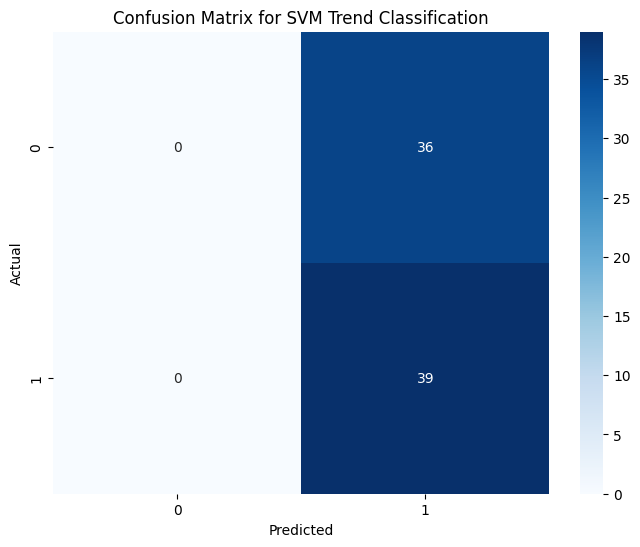

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Trend Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

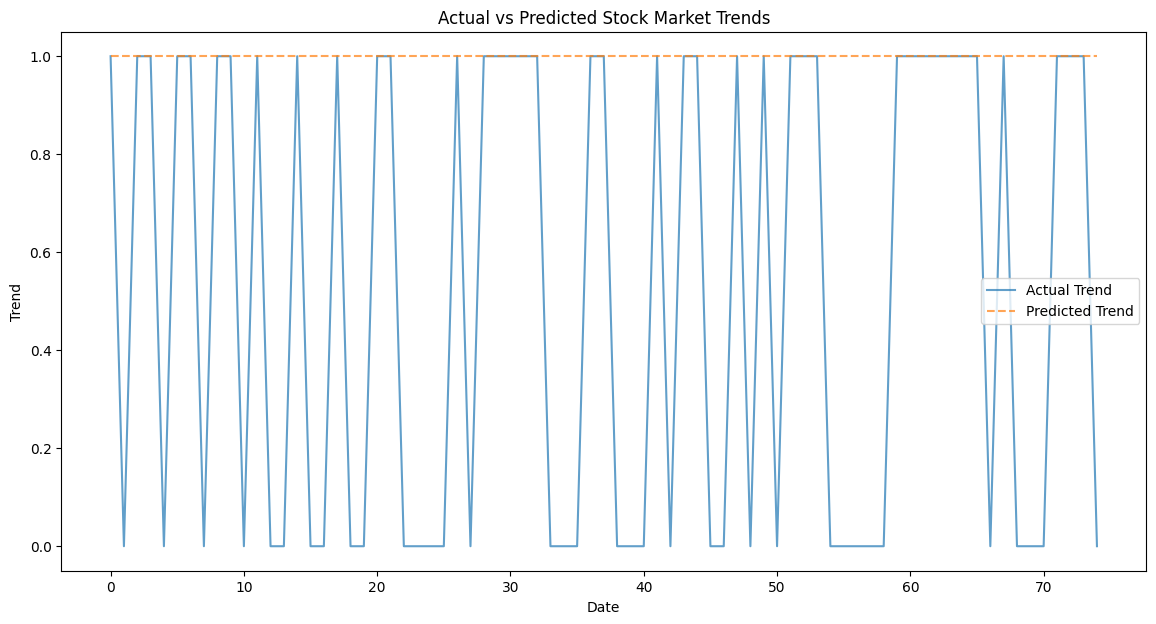

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

# Plot actual vs predicted trends
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Actual'], label='Actual Trend', alpha=0.7)
plt.plot(comparison_df['Predicted'], label='Predicted Trend', alpha=0.7, linestyle='--')
plt.title('Actual vs Predicted Stock Market Trends')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

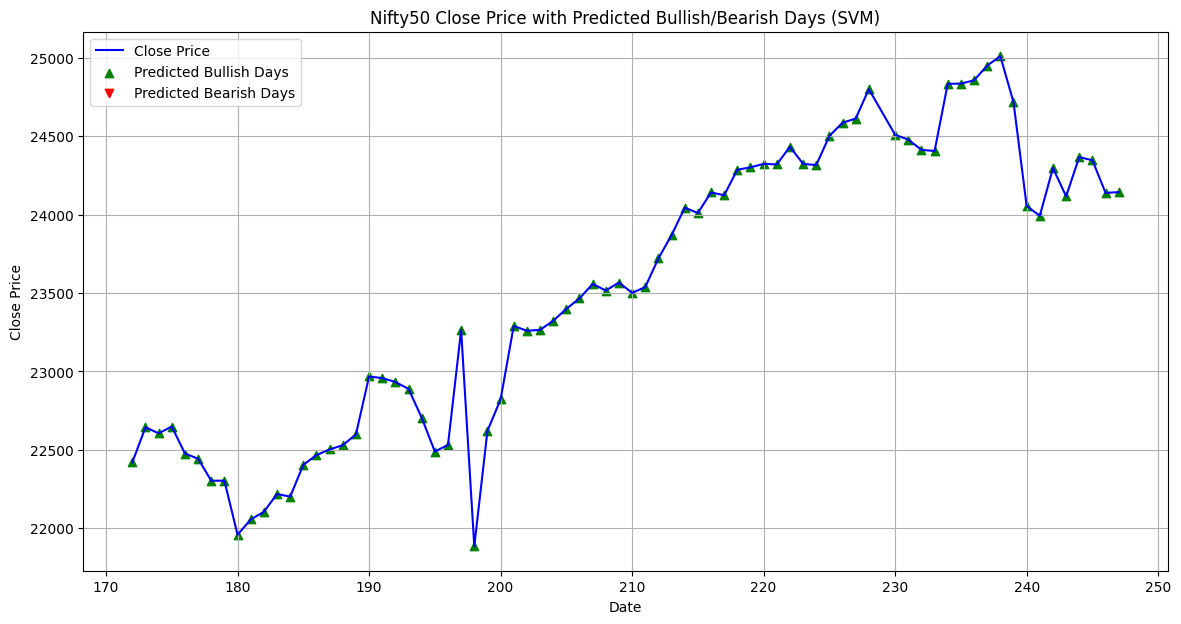

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], data['Close '][-len(y_test):], label='Close Price', color='blue')

bullish_days = data.index[-len(y_test):][y_pred == 1]
plt.scatter(bullish_days, data['Close '][-len(y_test):][y_pred == 1], color='green', label='Predicted Bullish Days', marker='^')

bearish_days = data.index[-len(y_test):][y_pred == 0]
plt.scatter(bearish_days, data['Close '][-len(y_test):][y_pred == 0], color='red', label='Predicted Bearish Days', marker='v')

plt.title('Nifty50 Close Price with Predicted Bullish/Bearish Days (SVM)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#**XGBoost**

In [ ]:
data['Return'] = data['Close '].pct_change()
data['Trend'] = np.where(data['Return'] > 0, 1, 0)

In [ ]:
data['MA20'] = data['Close '].rolling(window=20).mean()
data['MA50'] = data['Close '].rolling(window=50).mean()
data['RSI'] = 100 - (100 / (1 + data['Return'].rolling(window=14).mean() / data['Return'].rolling(window=14).std()))
data = data.dropna()


In [ ]:
features = data[['Close ', 'MA20', 'MA50', 'RSI']].copy()
target = data['Trend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)
predicted_stock_price = model.predict_proba(X_test)[:, 1] * X_test['Close ']

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Accuracy: 0.57
Mean Squared Error: 0.42


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.57      1.00      0.73        23

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


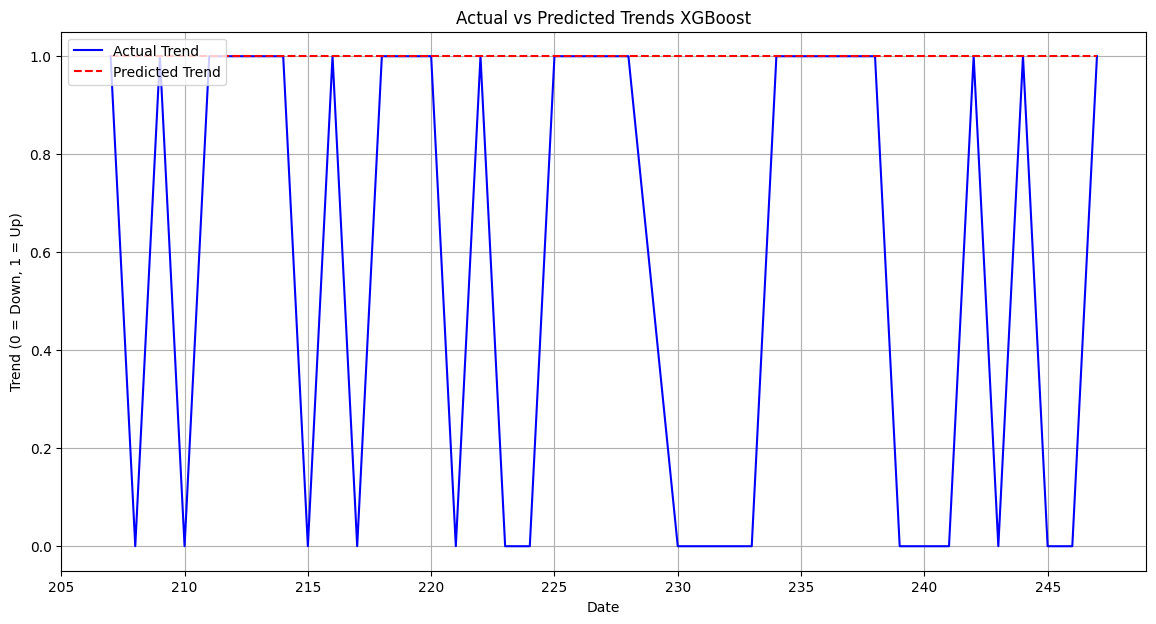

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Trend', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Trend', color='red', linestyle='--')
plt.title('Actual vs Predicted Trends XGBoost')
plt.xlabel('Date')
plt.ylabel('Trend (0 = Down, 1 = Up)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

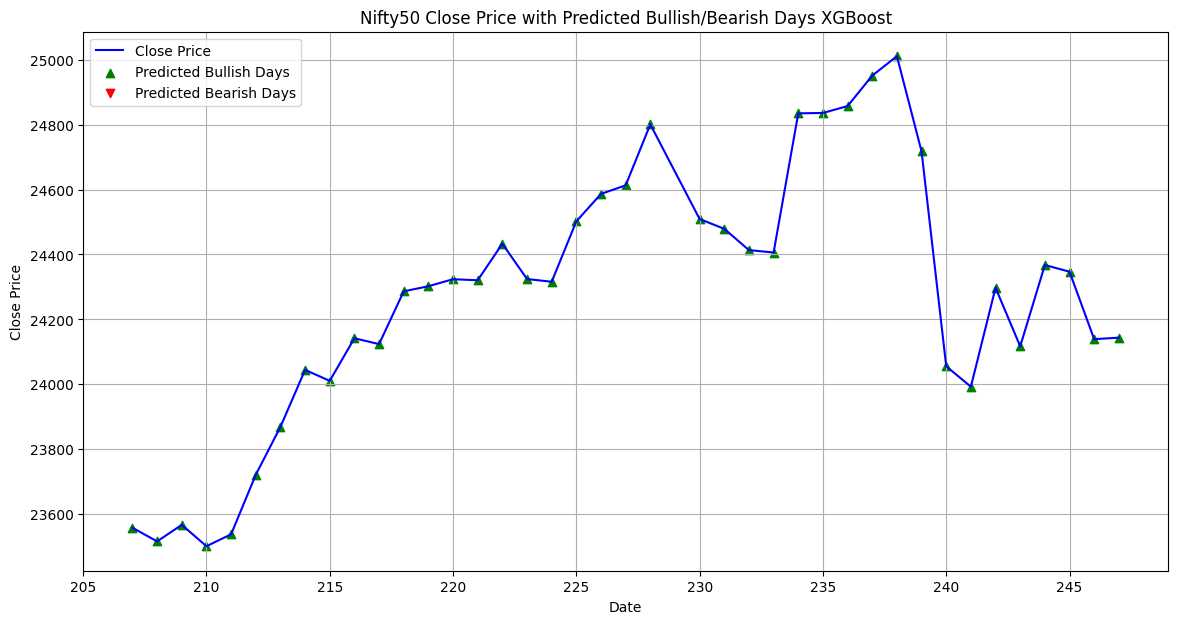

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], data['Close '][-len(y_test):], label='Close Price', color='blue')

# the predicted bullish days
bullish_days = data.index[-len(y_test):][y_pred == 1]
plt.scatter(bullish_days, data['Close '][-len(y_test):][y_pred == 1], color='green', label='Predicted Bullish Days', marker='^')

# the predicted bearish days
bearish_days = data.index[-len(y_test):][y_pred == 0]
plt.scatter(bearish_days, data['Close '][-len(y_test):][y_pred == 0], color='red', label='Predicted Bearish Days', marker='v')

plt.title('Nifty50 Close Price with Predicted Bullish/Bearish Days XGBoost')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

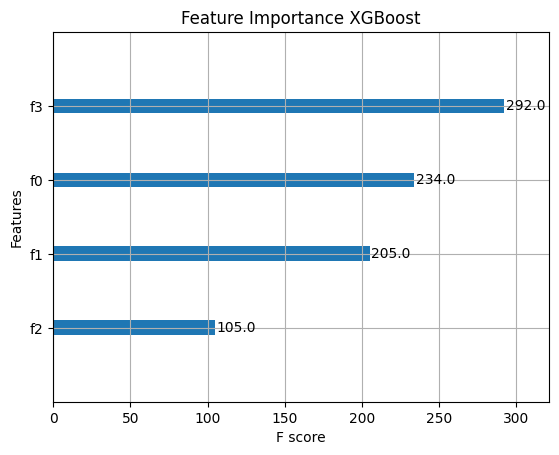

In [ ]:
xgb.plot_importance(model)
plt.title('Feature Importance XGBoost')
plt.show()

# **Random forest Regessor**

In [ ]:
X = data[['Open ', 'High ', 'Low ', 'Shares Traded ', 'Turnover (₹ Cr)']]
y = data['Close ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8254.666495925336
Mean Absolute Error: 66.27886666666679
R^2 Score: 0.9954296766104902


<ipython-input-200-4f2339528424>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


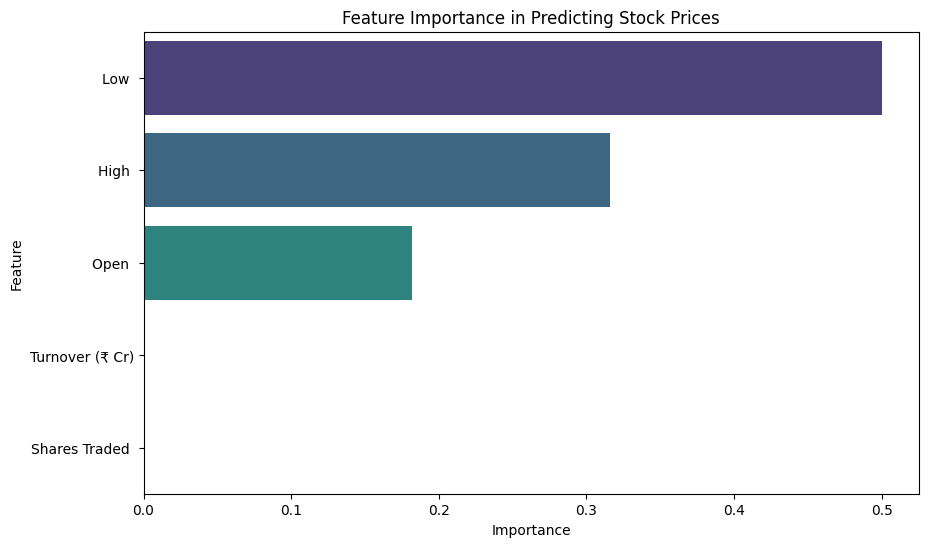

In [ ]:
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Stock Prices')
plt.show()

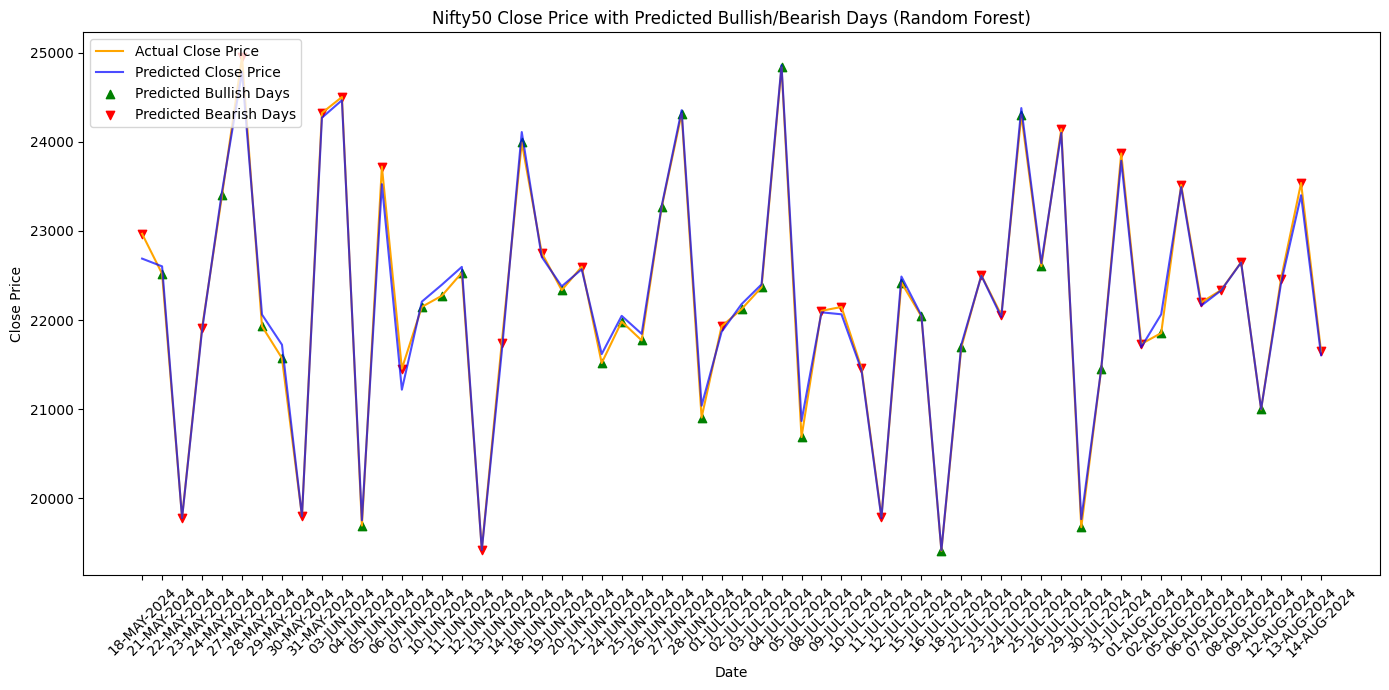

In [ ]:
dates = data['Date '][-len(y_test):].reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)

bullish_days = dates[y_pred > y_test]
bearish_days = dates[y_pred < y_test]

plt.figure(figsize=(14, 7))
plt.plot(dates, y_test, label='Actual Close Price', color='orange')
plt.plot(dates, y_pred, label='Predicted Close Price', color='blue', alpha = 0.7)
plt.scatter(bullish_days, y_test[y_pred > y_test], color='green', label='Predicted Bullish Days', marker='^')
plt.scatter(bearish_days, y_test[y_pred < y_test], color='red', label='Predicted Bearish Days', marker='v')
plt.title('Nifty50 Close Price with Predicted Bullish/Bearish Days (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


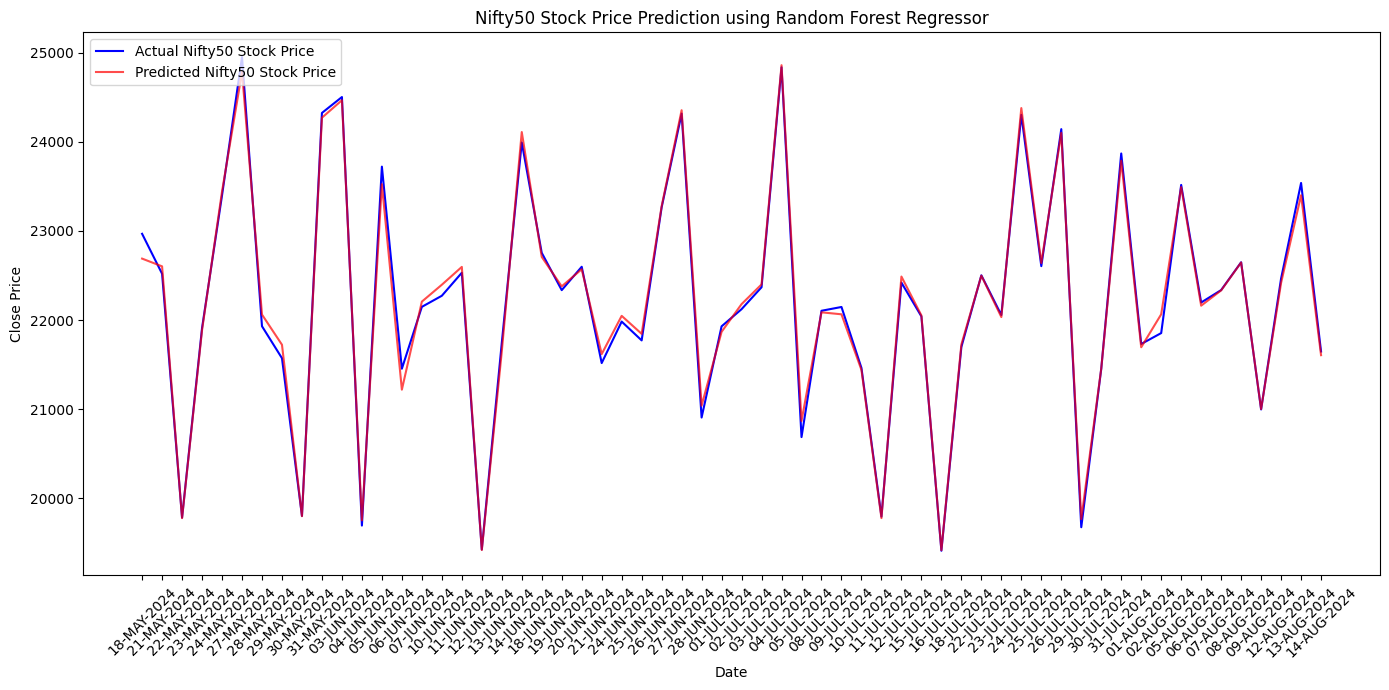

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date '][-len(y_test):], y_test, color='blue', label='Actual Nifty50 Stock Price')
plt.plot(data['Date '][-len(y_test):], y_pred, color='red', label='Predicted Nifty50 Stock Price', alpha = 0.7)
plt.title('Nifty50 Stock Price Prediction using Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

# **Prophet**

In [ ]:
from prophet import Prophet

In [ ]:
prophet = data[['Date ', 'Close ']]
prophet.columns = ['ds', 'y']

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(prophet)


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ksxml8k/0kzwiw8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ksxml8k/34d3fs_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/di

In [ ]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

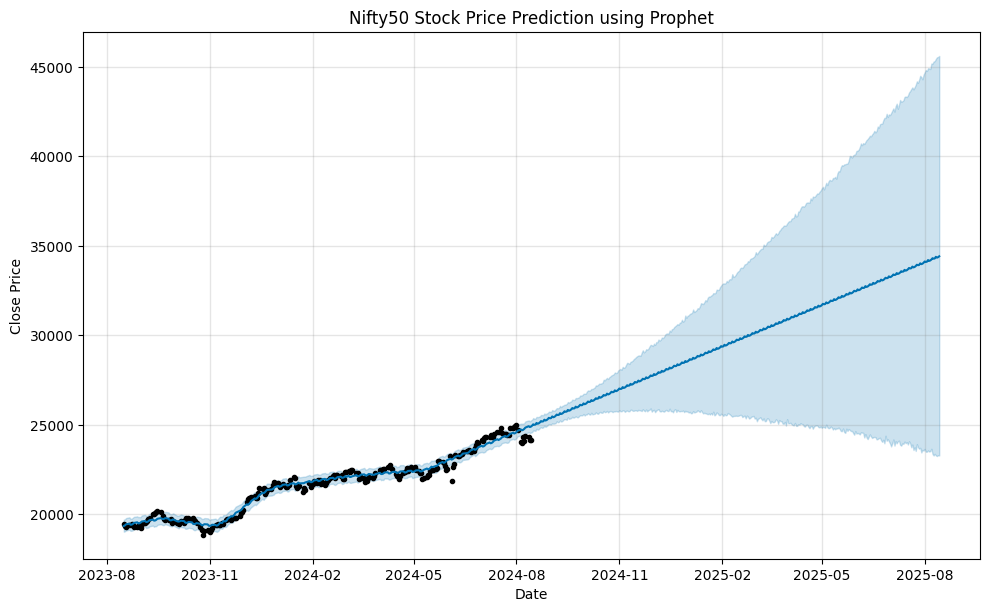

In [ ]:
model.plot(forecast)
plt.title('Nifty50 Stock Price Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

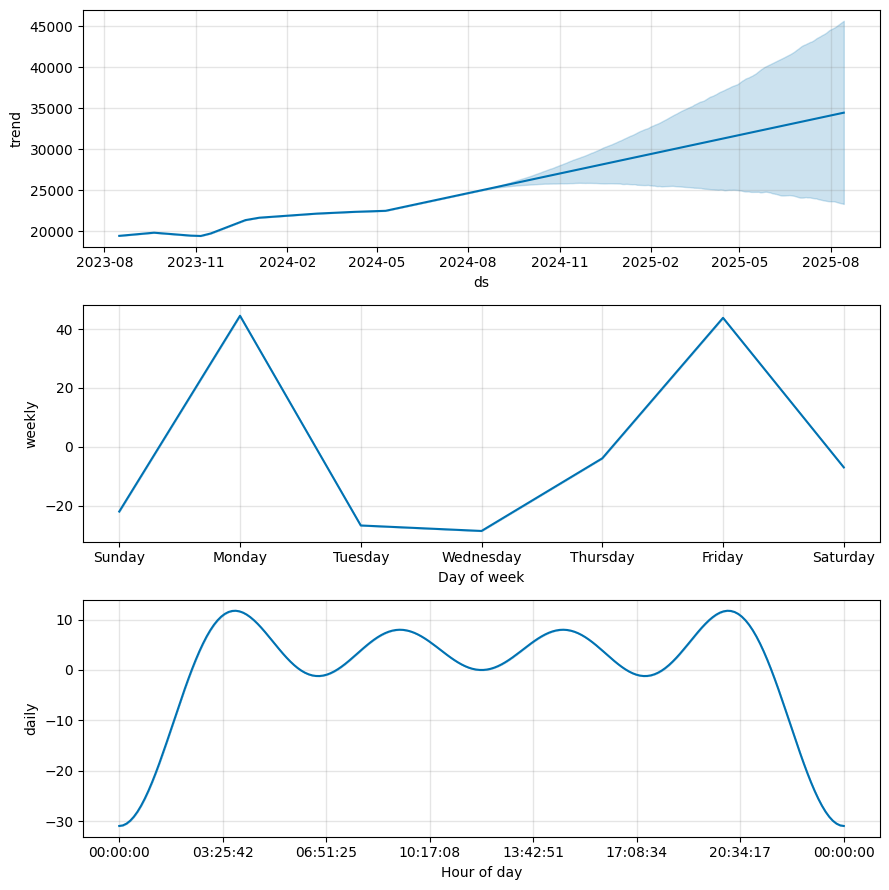

In [ ]:
model.plot_components(forecast)
plt.show()

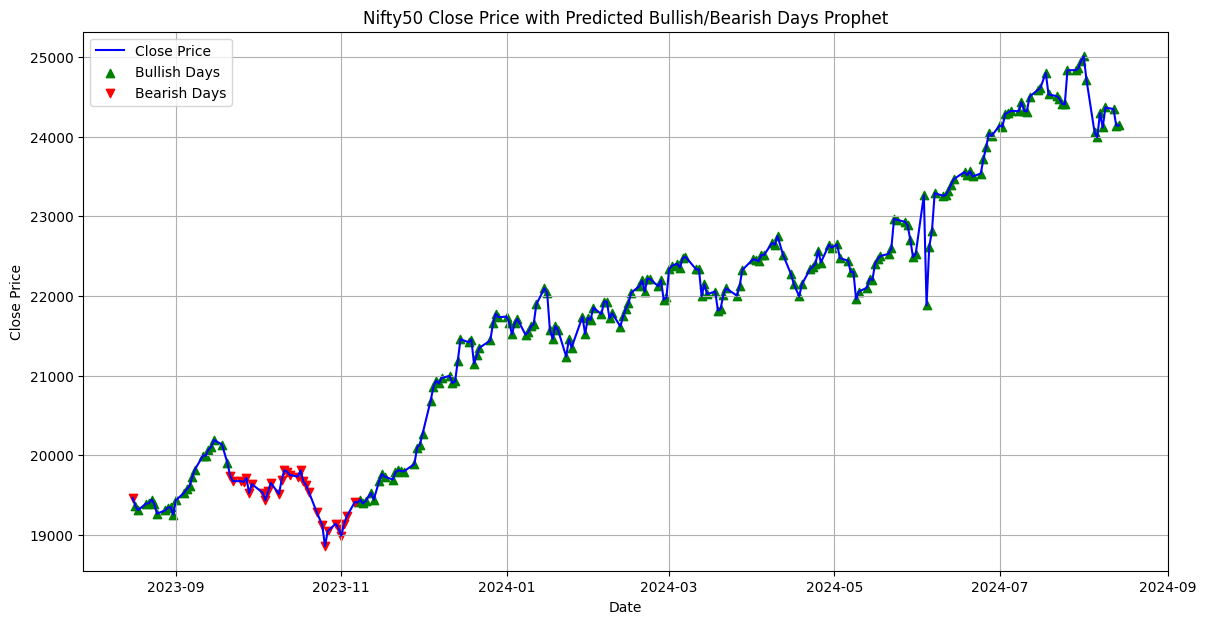

In [ ]:
forecast['trend_change'] = (forecast['trend'] > forecast['trend'].shift(1)).astype(int)

bullish_days = forecast['ds'][forecast['trend_change'] == 1]
bearish_days = forecast['ds'][forecast['trend_change'] == 0]

bullish_close = data[data['Date '].isin(bullish_days)]['Close ']
bearish_close = data[data['Date '].isin(bearish_days)]['Close ']

bullish_days = bullish_days[bullish_days.isin(data['Date '])]
bearish_days = bearish_days[bearish_days.isin(data['Date '])]

plt.figure(figsize=(14, 7))
plt.plot(data['Date '], data['Close '], label='Close Price', color='blue')
plt.scatter(bullish_days, bullish_close, color='green', label='Bullish Days', marker='^')
plt.scatter(bearish_days, bearish_close, color='red', label='Bearish Days', marker='v')
plt.title('Nifty50 Close Price with Predicted Bullish/Bearish Days Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()